# __Creating and Backtesting MACD Strategies__

> The MACD (Moving Average Convergence Divergence) is a popular technical analysis indicator used in trading to identify __potential trend reversals, momentum changes, and the strength of a trend__. The MACD strategy involves using the `MACD line`, the `signal line`, and the `histogram to generate trading signals`.





__Here's a breakdown of the key components of the MACD and how the strategy works:__

1. __MACD Line (Fast Line):__ This is the main line on the MACD indicator. It is __calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA__. The MACD line is more sensitive to short-term price movements.

2. __Signal Line (Slow Line):__ The signal line is a __9-period EMA of the MACD line (of the Fast line! "avarage of avarage")__. It helps smooth out the MACD line (smooth the fast line), and generates trading signals. Crossovers between the MACD line and the signal line are used to generate buy or sell signals.

3. __Histogram:__ The histogram represents the difference between the MACD line and the signal line. When the MACD line is above the signal line, the histogram is positive, indicating bullish momentum. Conversely, when the MACD line is below the signal line, the histogram is negative, indicating bearish momentum.



__Clearfy about Fast Line & Slow Line:__

> __The MACD line (Fast Line)__ is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA of the __price__. So, the MACD line itself is not a moving average; __it's the difference between two moving averages.__

> __The Signal line (Slow line)__, is a 9-period Exponential Moving Average (EMA) __of the MACD line__, __not the price!__. This means __it's an average of the values of the MACD line over a 9-period EMA, not a direct average of the price.__

---

# Getting the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
data = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


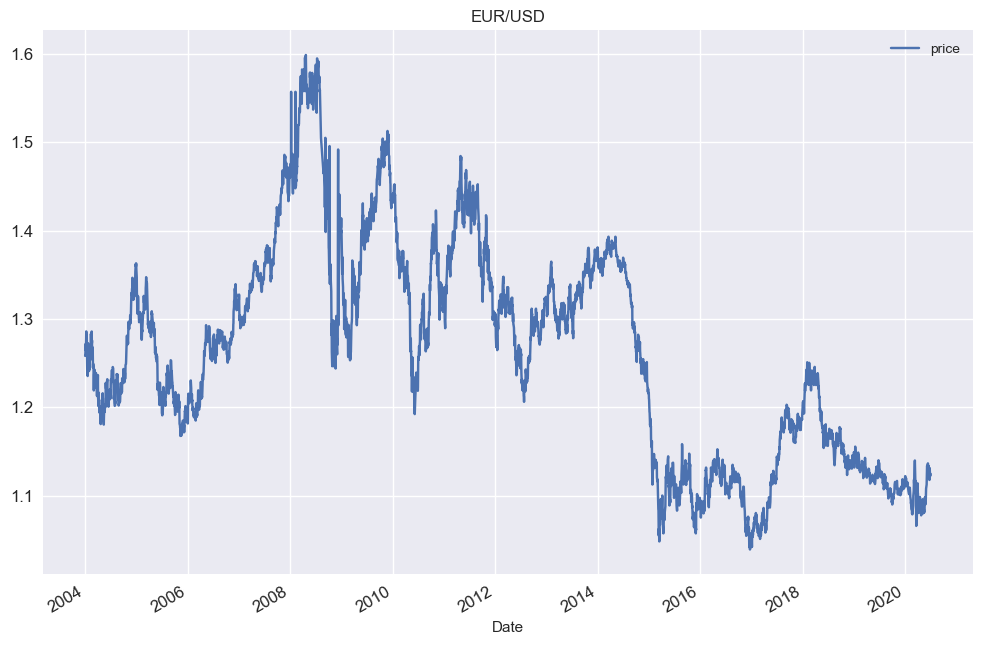

In [6]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

---

# Defining an MACD Strategy (Part 1)

In [7]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [8]:
## Set parameters for the MACD line (faster line).
# the MACD line (faster line) is the different betweem: EMA 26 - EMA 12.

ema_s = 12 # EMA Short
ema_l = 26 # EMA Long

In [9]:
# Compute the EMA sort (12)
data["EMA_S"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean() 

In [10]:
# Compute the EMA long (26)
data["EMA_L"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [11]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.125123,1.117852
2020-06-25,1.125087,1.125118,1.118388
2020-06-26,1.122208,1.124670,1.118671


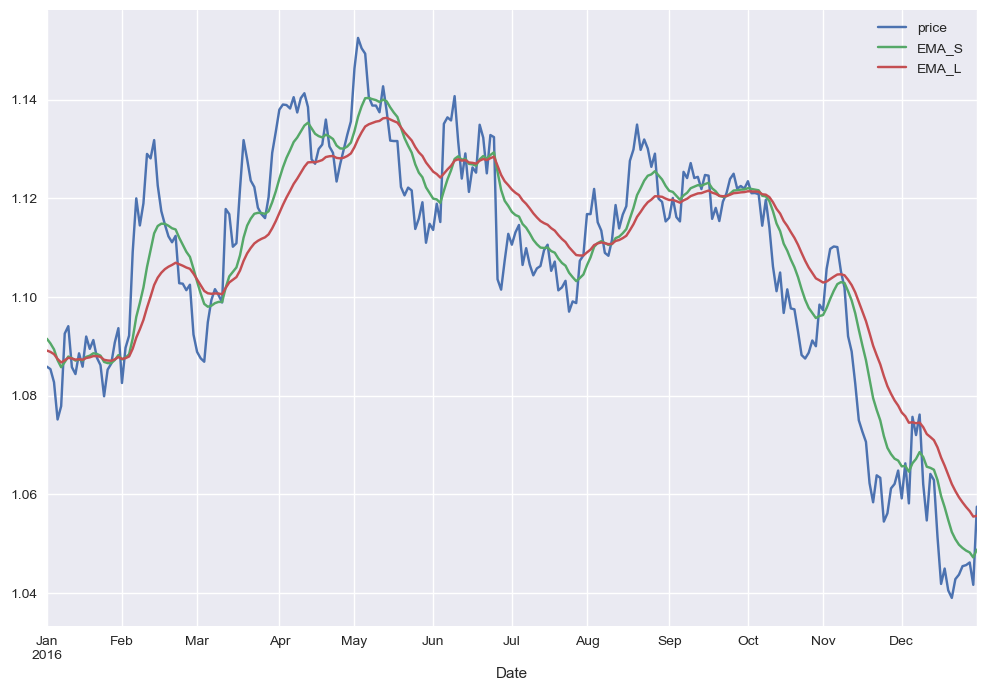

In [12]:
# Plot the EMA sort/long (12/26)
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8))
plt.show()

In [13]:
# Compute the MACD (Faster line)
# Its just the different between EMA 26 - EMA 12. 
data["MACD"] = data.EMA_S - data.EMA_L

In [14]:
data

,price,EMA_S,EMA_L,MACD
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,NaN,NaN,NaN
2004-01-05,1.268698,NaN,NaN,NaN
2004-01-06,1.272103,NaN,NaN,NaN
2004-01-07,1.264095,NaN,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272
2020-06-25,1.125087,1.125118,1.118388,0.006730
2020-06-26,1.122208,1.124670,1.118671,0.005999


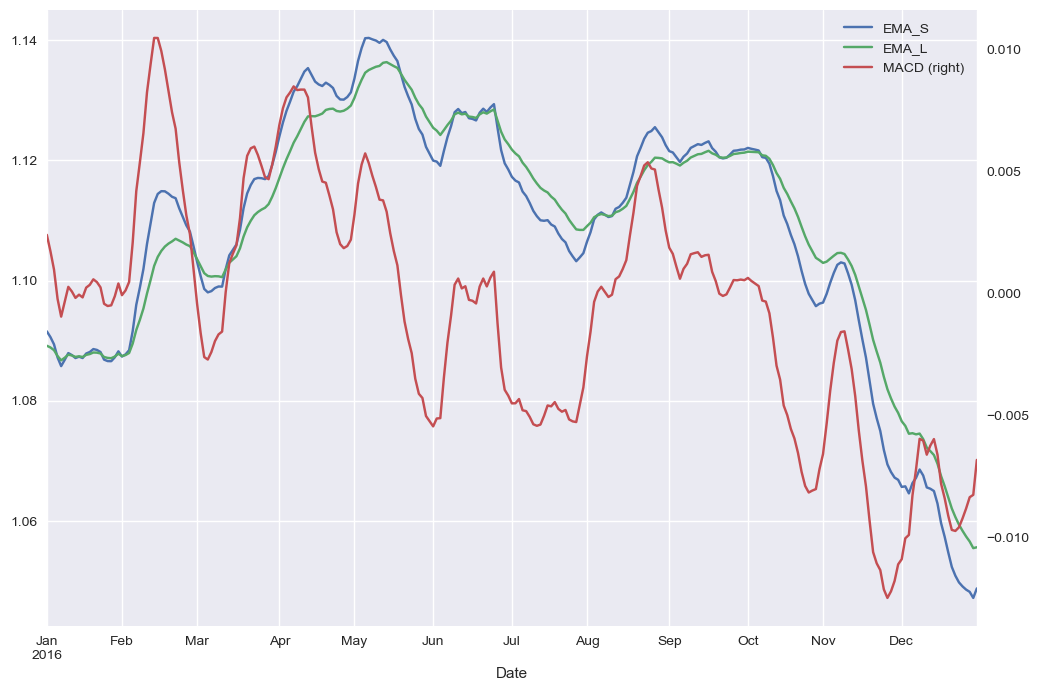

In [15]:
# Plot the MACD (Faster line), and its EMA sort/long.  
data.loc["2016", ["EMA_S", "EMA_L", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

In [16]:
# Moving Window for Signal Line
signal_mw = 9 

In [17]:
# Compute the MACD Signal (Slower line) How?
# This is the 9 period Exponential moving avarage of the Faster line!

# See? we take the EMA of the Faster line. (take avarage from avarage) 
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw,
                                    min_periods = signal_mw).mean() 

In [18]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN
2004-01-02,1.258194,NaN,NaN,NaN,NaN
2004-01-05,1.268698,NaN,NaN,NaN,NaN
2004-01-06,1.272103,NaN,NaN,NaN,NaN
2004-01-07,1.264095,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727


In [19]:
data.loc["2016"]

,price,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,
2016-01-01,1.085906,1.091559,1.089167,0.002392,0.002641
2016-01-04,1.085399,1.090611,1.088888,0.001723,0.002458
2016-01-05,1.082755,1.089402,1.088433,0.000969,0.002160
2016-01-06,1.075199,1.087217,1.087453,-0.000236,0.001681
2016-01-07,1.077900,1.085784,1.086745,-0.000962,0.001152
...,...,...,...,...,...
2016-12-26,1.045478,1.049165,1.058405,-0.009240,-0.008833
2016-12-27,1.045697,1.048631,1.057464,-0.008832,-0.008833
2016-12-28,1.046233,1.048262,1.056632,-0.008370,-0.008740


__Plot the MACD hyperparameters__
- `MACD (Faster line)`
- `MACD_Signal(Slower line)`

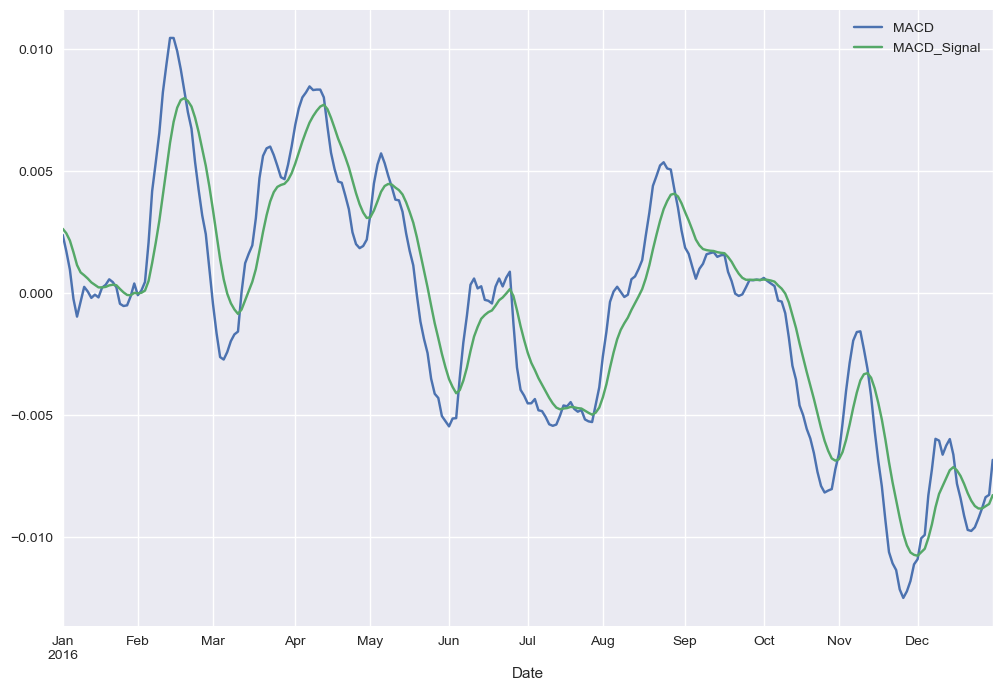

In [20]:
data.loc["2016", ["MACD", "MACD_Signal"]].plot(figsize = (12, 8))
plt.show()

---

# Defining an MACD Strategy (Part 2)

In [21]:
# The strategy is easy:
# Where the Fast MACD > Slow MACD, its signal to BUY (1)
# Where the Fast MACD < Slow MACD, its signal to SELL (-1)
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [22]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1


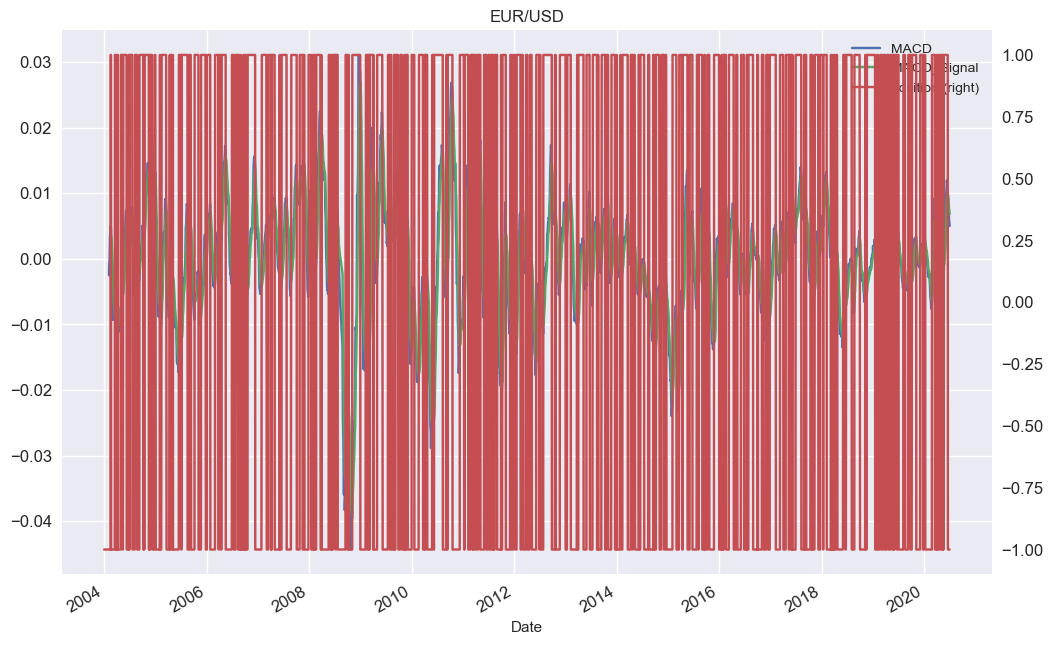

In [23]:
# Plot all the positions
data.loc[:, ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

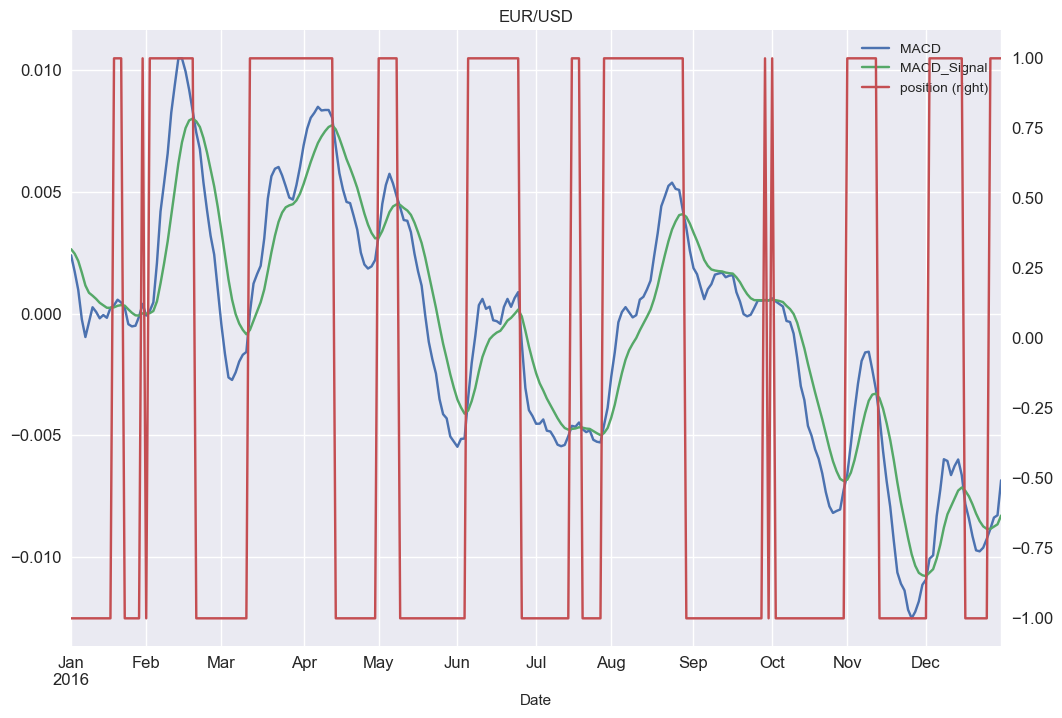

In [24]:
# ZOOM into 2016 positions strategy
data.loc["2016", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

---

# Vectorized Strategy Backtesting

> Let's evaluate the strategy

In [25]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1


In [26]:
# Compute the log return
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [27]:
data.dropna(inplace = True)

In [28]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns
Date,,,,,,,
2004-02-17,1.285793,1.271256,1.266191,0.005065,0.003018,1,0.007251
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562


In [29]:
# Compute the return based on our strategy 
data["strategy"] = data.position.shift(1) * data["returns"]

In [30]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy
Date,,,,,,,,
2004-02-17,1.285793,1.271256,1.266191,0.005065,0.003018,1,0.007251,NaN
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562


In [31]:
data.dropna(inplace = True)

In [32]:
# Proportional trading costs
ptc = 0.00007

In [33]:
# determine number of trades
# trade = change position
data["trades"] = data.position.diff().fillna(0).abs()

In [34]:
data.trades.value_counts()

# 2.0 * 377 = 754 trades! 

trades
0.0    3864
2.0     377
Name: count, dtype: int64

In [35]:
# Compute the neto strategy return, 
# by sbsrtucting the proportional trading costs from each trade 
data["strategy_net"] = data.strategy - data.trades * ptc

In [36]:
# cumelative return of:

# buy and hold strategy
data["creturns"] = data["returns"].cumsum().apply(np.exp)
# MACD strategy exclude trading costs
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
# MACD strategy include trading costs
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [37]:
data

,price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,0.003408,1,-0.010386,-0.010386,0.0,-0.010386,0.989667,0.989667,0.989667
2004-02-19,1.275705,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.002510,0.0,0.002510,0.992154,0.992154,0.992154
2004-02-20,1.254202,1.269345,1.266367,0.002978,0.003538,-1,-0.017000,-0.017000,2.0,-0.017140,0.975430,0.975430,0.975294
2004-02-23,1.257197,1.267473,1.265649,0.001824,0.003175,-1,0.002386,-0.002386,0.0,-0.002386,0.977760,0.973106,0.972969
2004-02-24,1.267797,1.267523,1.265817,0.001706,0.002868,-1,0.008395,-0.008395,0.0,-0.008395,0.986003,0.964970,0.964835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,0.008516,-1,0.002892,-0.002892,0.0,-0.002892,0.879795,0.436655,0.414206
2020-06-25,1.125087,1.125118,1.118388,0.006730,0.008158,-1,-0.005449,0.005449,0.0,0.005449,0.875014,0.439041,0.416470
2020-06-26,1.122208,1.124670,1.118671,0.005999,0.007727,-1,-0.002562,0.002562,0.0,0.002562,0.872775,0.440168,0.417538


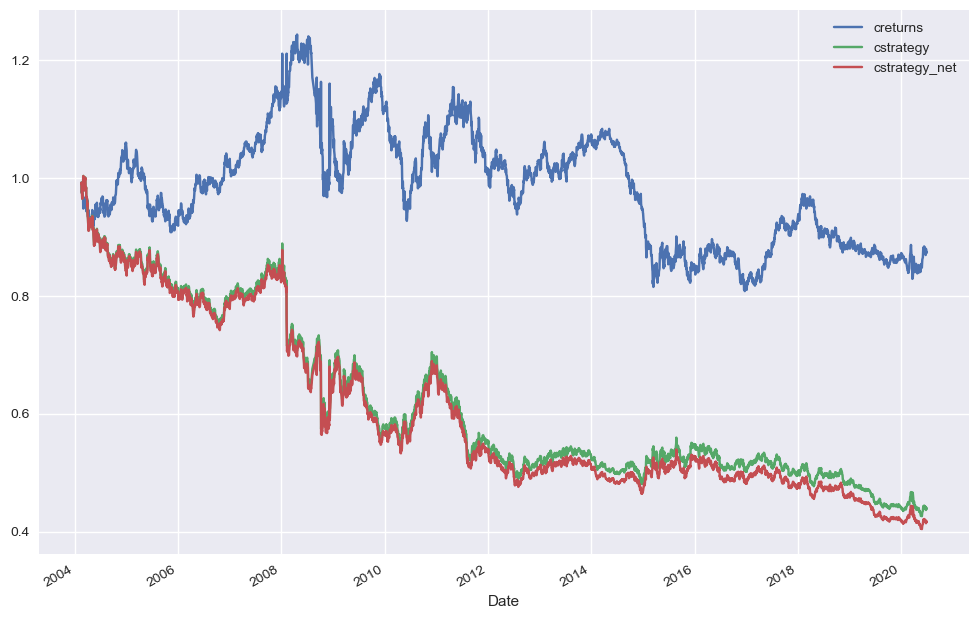

In [38]:
# Plot that
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

# the MACD with this hyper parameters not did well. 

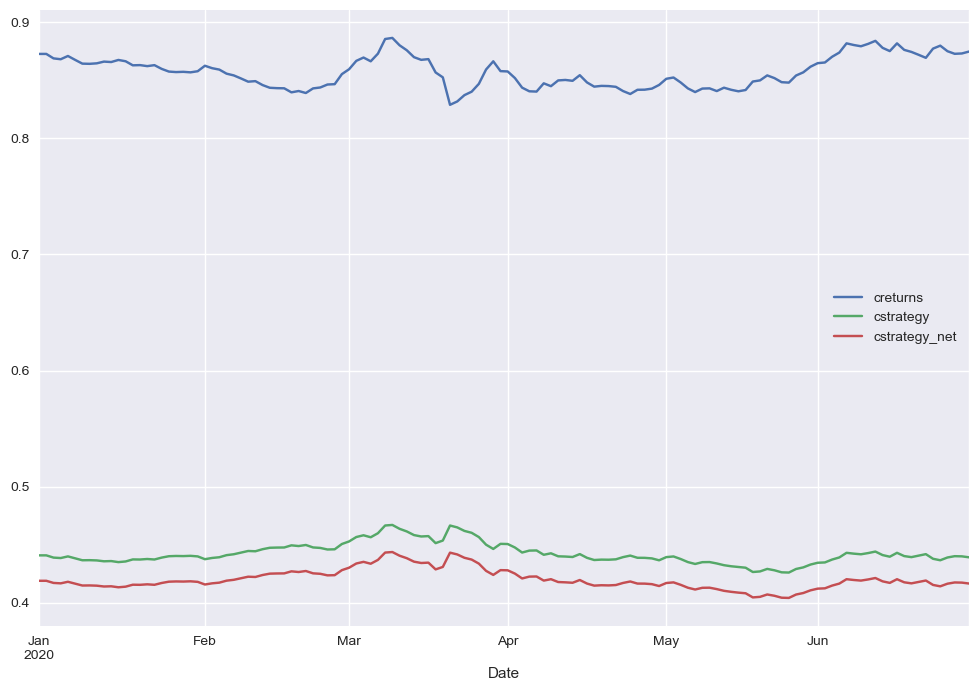

In [39]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

---

# Using the MACDBacktester Class

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [74]:
pd.read_csv("../Data/forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [75]:
from MACDBacktester import MACDBacktester as MACD

In [76]:
ptc = 0.00007

In [77]:
tester = MACD("EURUSD=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [78]:
tester

MACDBacktester(symbol = EURUSD=X, MACD(12, 26, 9), start = 2004-01-01, end = 2020-06-30)

In [79]:
tester.data

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.117852,0.007272,0.008516
2020-06-25,1.125087,-0.005449,1.125118,1.118388,0.006730,0.008158
2020-06-26,1.122208,-0.002562,1.124670,1.118671,0.005999,0.007727


In [80]:
tester.test_strategy()

(0.416605, -0.458123)

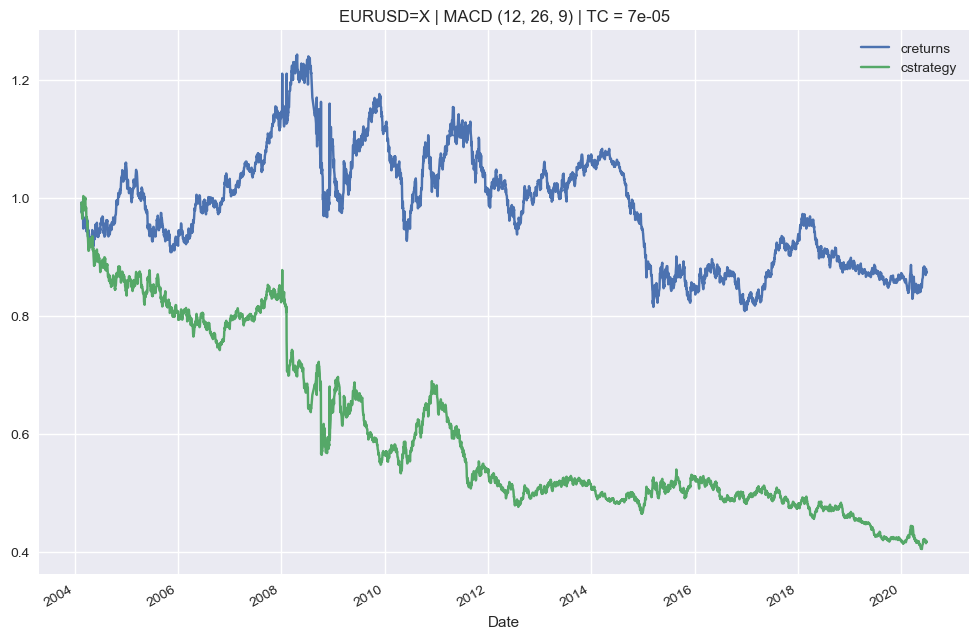

In [81]:
tester.plot_results()

In [82]:
tester.results

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,
2004-02-18,1.272508,-0.010386,1.271449,1.266693,0.004756,0.003408,1,-0.010386,0.0,0.989667,0.989667
2004-02-19,1.275705,0.002510,1.272106,1.267405,0.004700,0.003691,1,0.002510,0.0,0.992154,0.992154
2004-02-20,1.254202,-0.017000,1.269345,1.266367,0.002978,0.003538,-1,-0.017140,2.0,0.975430,0.975294
2004-02-23,1.257197,0.002386,1.267473,1.265649,0.001824,0.003175,-1,-0.002386,0.0,0.977760,0.972969
2004-02-24,1.267797,0.008395,1.267523,1.265817,0.001706,0.002868,-1,-0.008395,0.0,0.986003,0.964835
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.117852,0.007272,0.008516,-1,-0.002892,0.0,0.879795,0.414206
2020-06-25,1.125087,-0.005449,1.125118,1.118388,0.006730,0.008158,-1,0.005449,0.0,0.875014,0.416470
2020-06-26,1.122208,-0.002562,1.124670,1.118671,0.005999,0.007727,-1,0.002562,0.0,0.872775,0.417538


In [83]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([18., 30., 19.]), 0.760579)

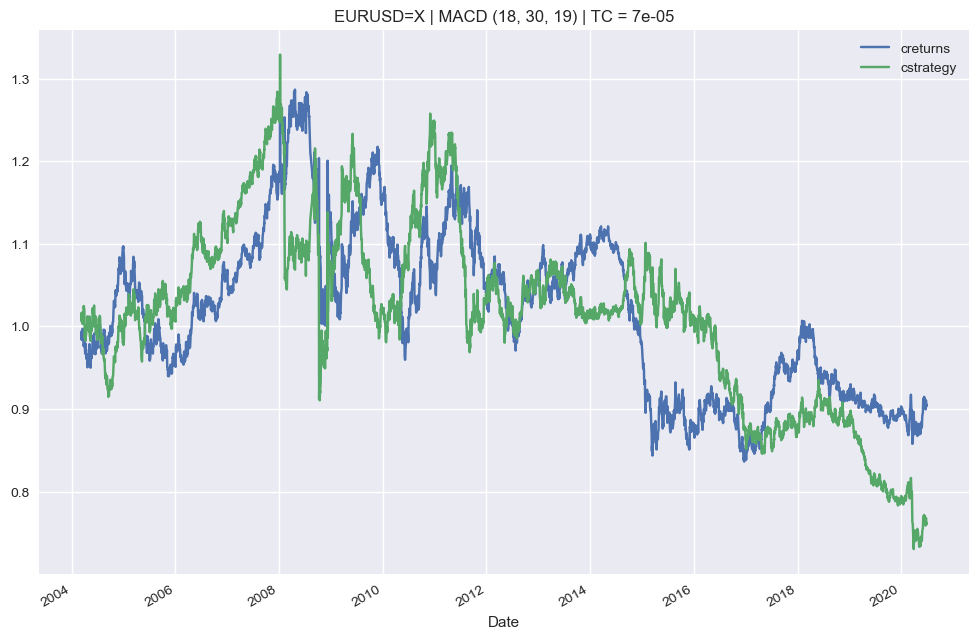

In [84]:
tester.plot_results()

---

__AUD / EUR__

In [85]:
tester = MACD("AUDEUR=X", EMA_S = 12, EMA_L = 26, signal_mw = 9, 
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [86]:
tester.test_strategy()

(1.061038, 0.076032)

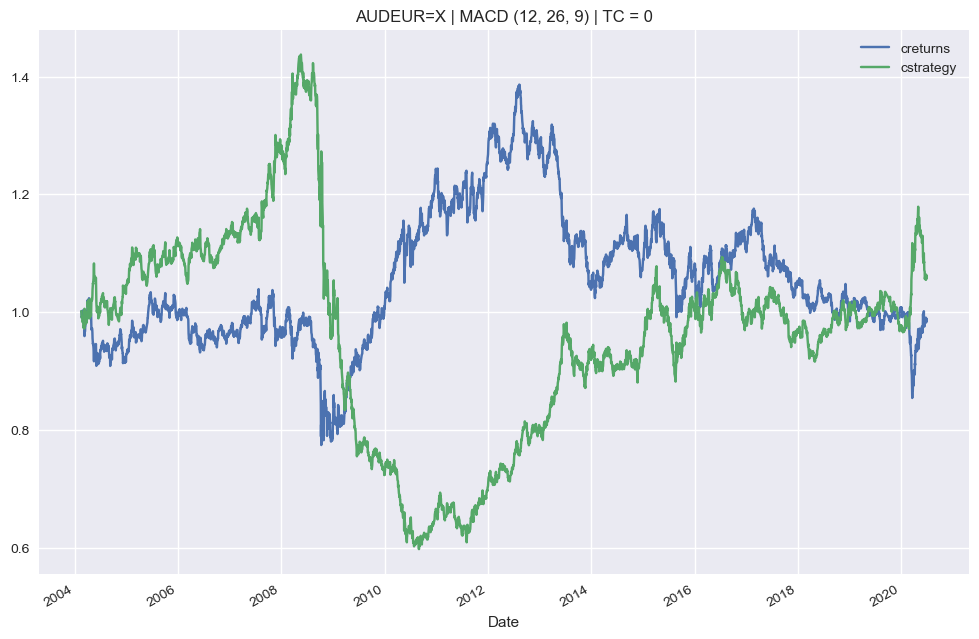

In [87]:
tester.plot_results()

In [88]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([ 5., 23.,  6.]), 2.183987)

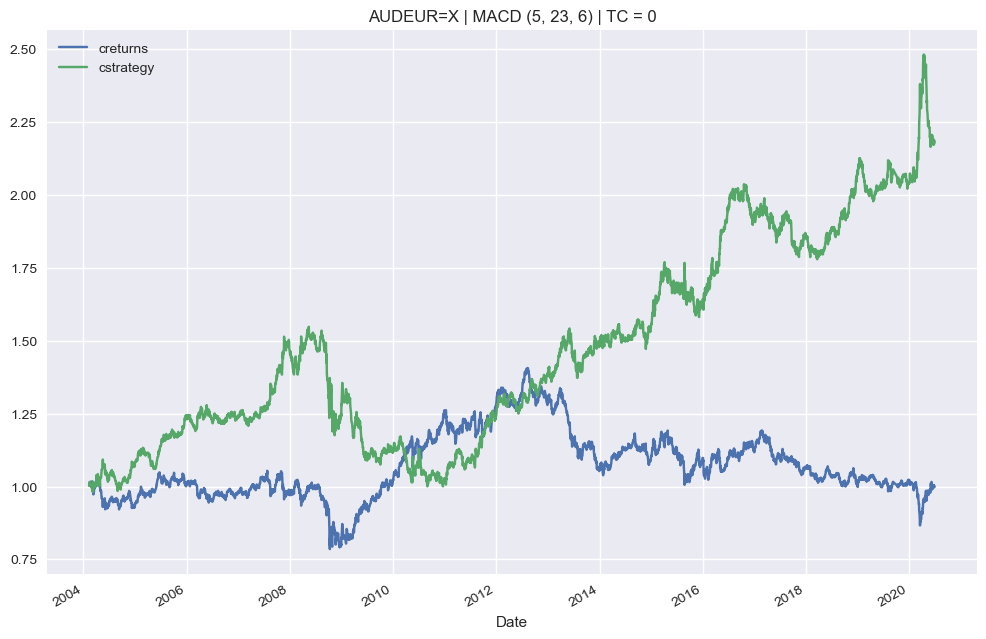

In [89]:
tester.plot_results()

__Optimization and Backtesting (2004-2014)__ ("In-Sample")

In [96]:
tester = MACD("AUDEUR=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2014-12-31", tc = 0.00007)

In [97]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([ 6., 24.,  7.]), 1.497132)

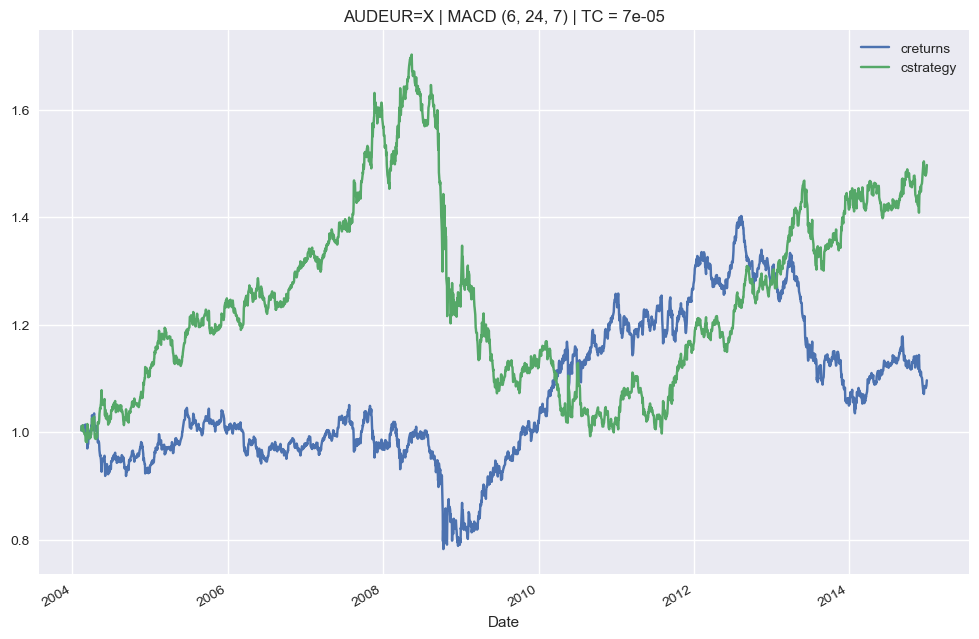

In [98]:
tester.plot_results()

__Forward Testing (2015-2020)__ ("Out-Sample")

In [93]:
forwardtester = MACD("AUDEUR=X", EMA_S = 6, EMA_L = 24, signal_mw = 7,
                     start = "2015-01-01", end = "2020-06-30", tc = 0.00007)

In [94]:
forwardtester.test_strategy()

(1.210518, 0.321834)

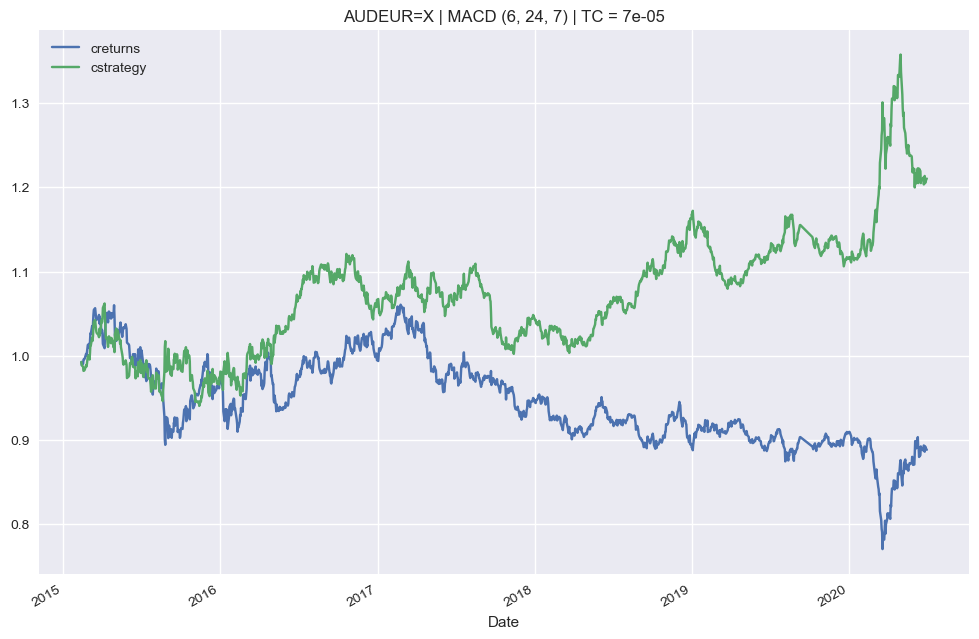

In [95]:
forwardtester.plot_results()

---

# Alternative Strategies and Interpretations

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
from MACDBacktester import MACDBacktester as MACD

In [65]:
tester = MACD("EURUSD=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [66]:
alt = tester.data.dropna()
alt

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,,
2004-02-17,1.285793,0.007251,1.271256,1.266191,0.005065,0.003018
2004-02-18,1.272508,-0.010386,1.271449,1.266693,0.004756,0.003408
2004-02-19,1.275705,0.002510,1.272106,1.267405,0.004700,0.003691
2004-02-20,1.254202,-0.017000,1.269345,1.266367,0.002978,0.003538
2004-02-23,1.257197,0.002386,1.267473,1.265649,0.001824,0.003175
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.117852,0.007272,0.008516
2020-06-25,1.125087,-0.005449,1.125118,1.118388,0.006730,0.008158
2020-06-26,1.122208,-0.002562,1.124670,1.118671,0.005999,0.007727


__Main Strategy: MACD Signal Line Crossover__

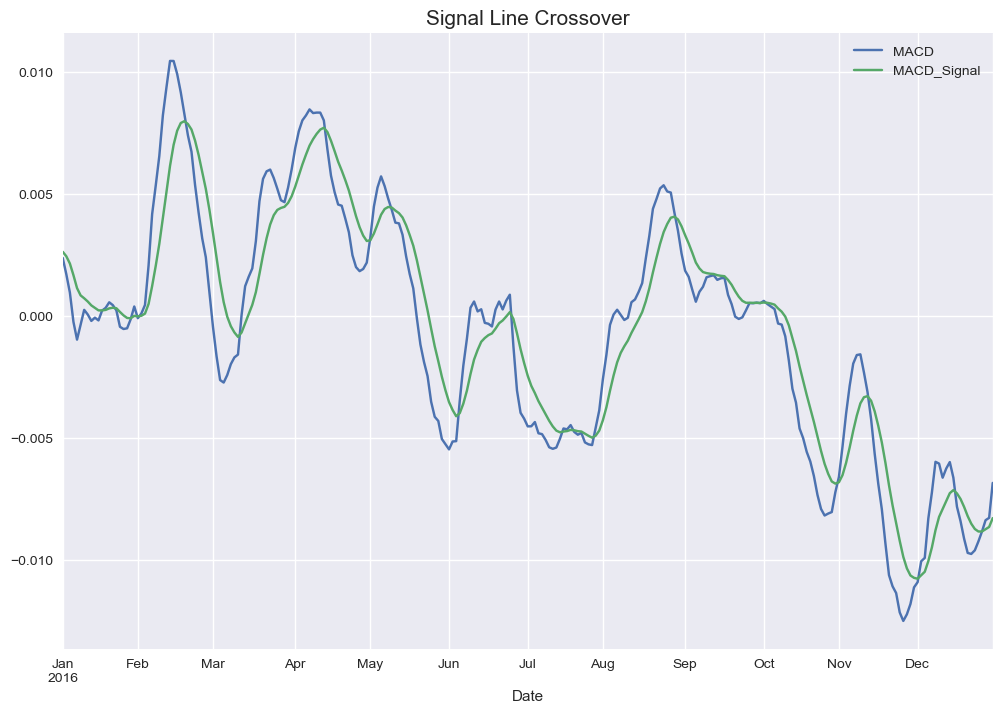

In [67]:
alt.loc["2016", ["MACD", "MACD_Signal"]].plot(figsize = (12, 8))
#plt.hlines(y = 0, xmin = alt.index[0], xmax = alt.index[-1], color = "r", label = "Zero")
plt.title("Signal Line Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 1: Zero Crossover__

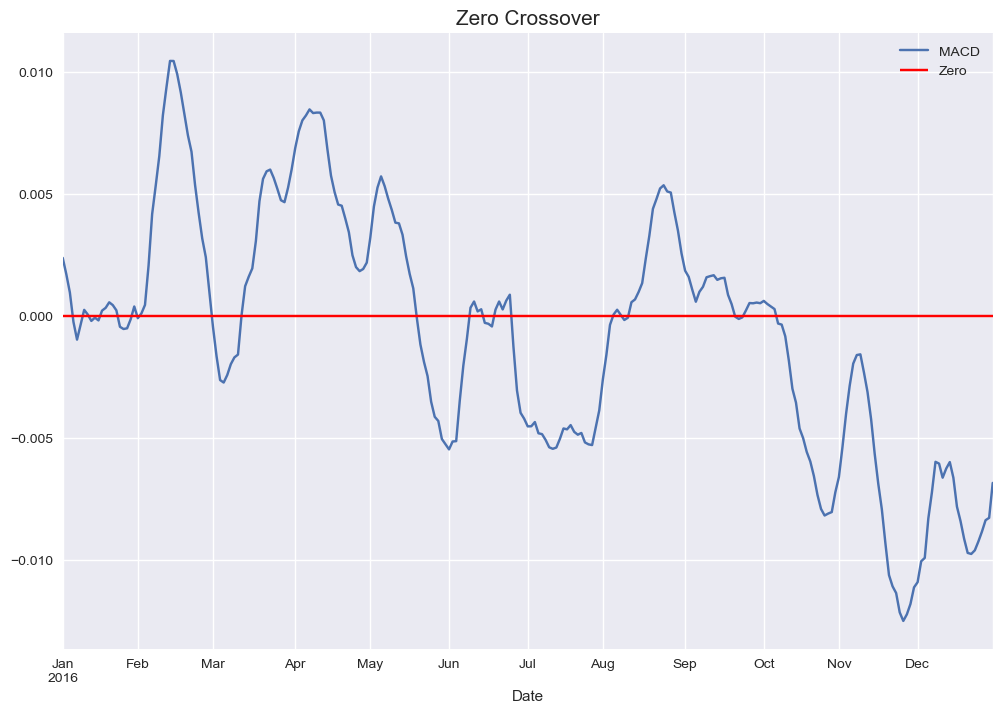

In [68]:
alt.loc["2016", "MACD"].plot(figsize = (12, 8))
plt.hlines(y = 0, xmin = alt.index[0], xmax = alt.index[-1], color = "r", label = "Zero")
plt.title("Zero Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 2: Divergence__

Convergence: 
- if __Price__ reaches __higher highs__ -> __MACD__ reaches __higher highs__ (confirmation)
- if __Price__ reaches __lower lows__ -> __MACD__ reaches __lower lows__ (confirmation) 

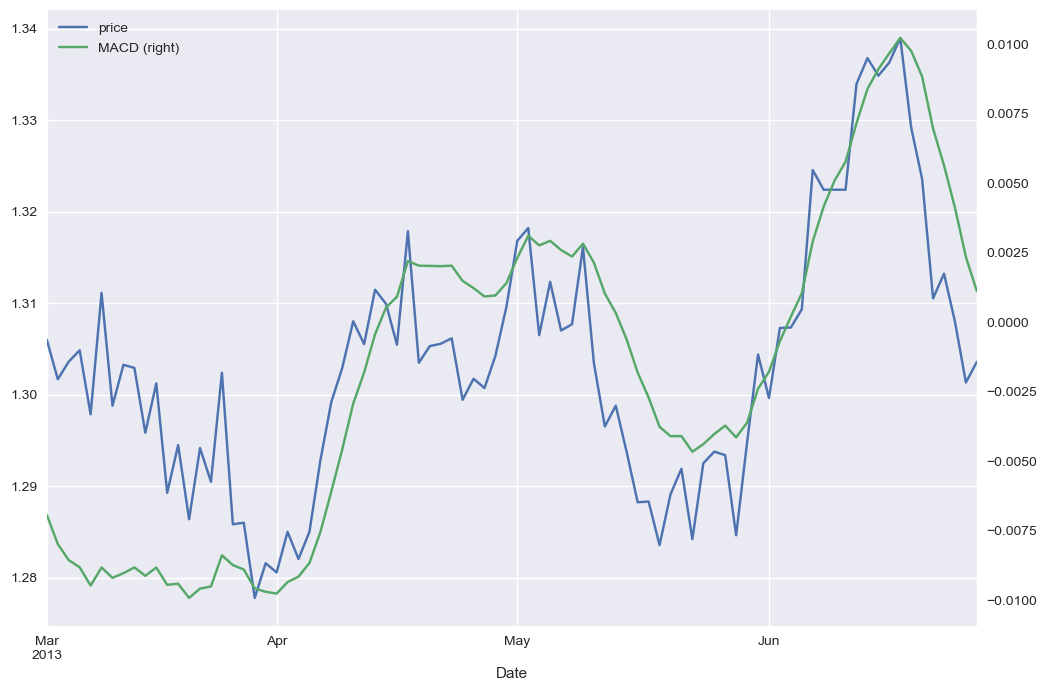

In [69]:
alt.loc["03-2013":"06-2013", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

Divergence: 
- if __Price__ reaches __higher highs__ -> __MACD fails__ to reach higher highs (__Bearish Divergence__)
- if __Price__ reaches __lower lows__ -> __MACD fails__ to reach lower lows (__Bullish Divergence__)

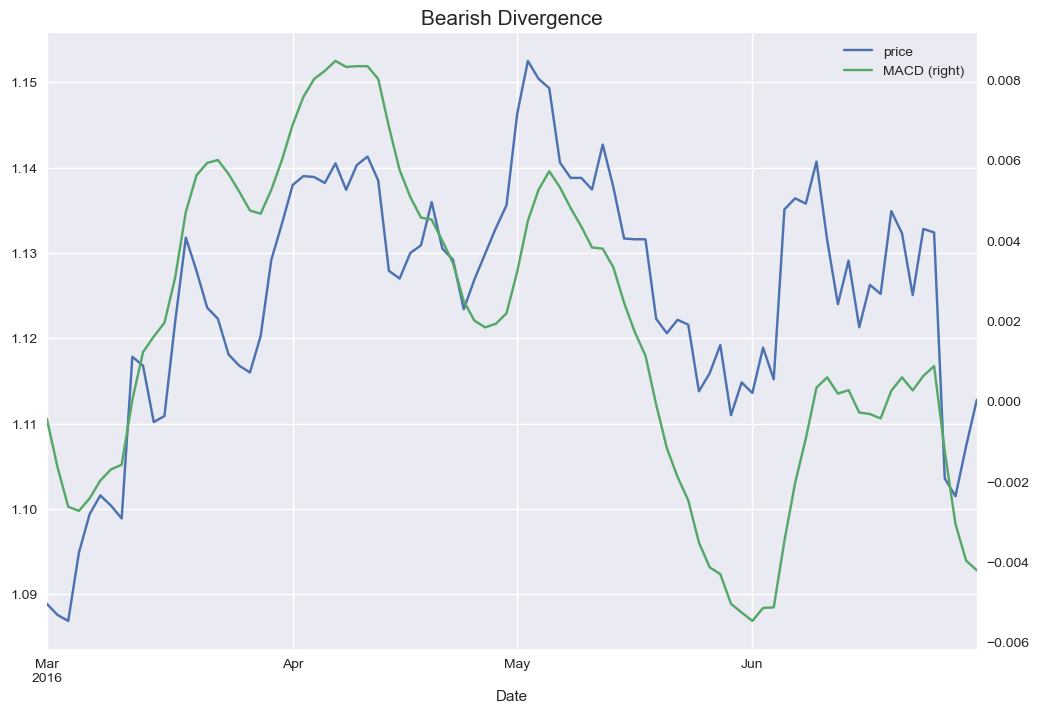

In [70]:
alt.loc["03-2016":"06-2016", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.title("Bearish Divergence", fontsize = 15)
plt.show()

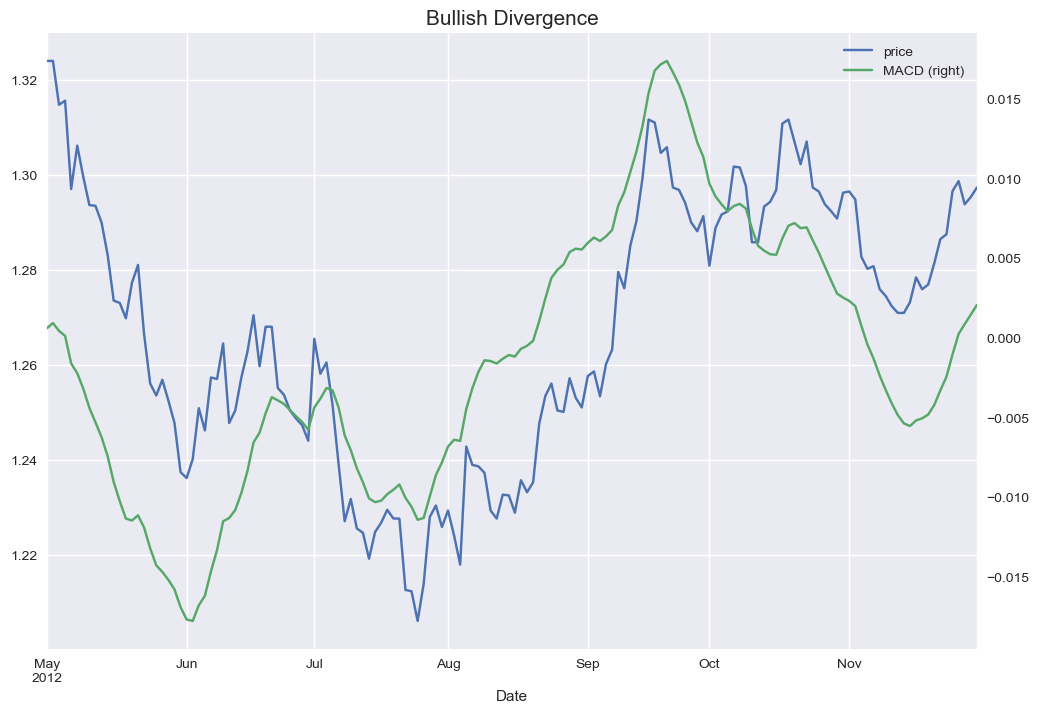

In [71]:
alt.loc["05-2012":"11-2012", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.title("Bullish Divergence", fontsize = 15)
plt.show()

---

# Forex Example

_Imagine you believe that the Australian Dollar (AUD) will strengthen against the Euro (EUR), and you decide to go "long" on the AUD/EUR pair._

- __Current Exchange Rate:__
Let's say the current exchange rate is 0.6200, meaning 1 Australian Dollar is equivalent to 0.62 Euros.

- __Decision to Go Long:__
You decide to go "long" with the expectation that the value of the Australian Dollar will increase relative to the Euro.

- __Transaction:__
You decide to buy 1,000 Australian Dollars.

- __Calculation:__
With an exchange rate of 0.6200, buying 1,000 Australian Dollars would cost you 1,000 * 0.62 = 620 Euros.

- __Waiting for Appreciation:__
Now, you wait for the Australian Dollar to strengthen against the Euro, hoping that the exchange rate will increase.

- __Profit (if the exchange rate goes up):__
If the exchange rate rises to, for example, 0.6400, your 1,000 Australian Dollars are now worth 1,000 * 0.64 = 640 Euros.
You could sell your Australian Dollars for Euros and realize a profit of 640 - 620 = 20 Euros.

__Buy AUD with EUR__: You exchange your Euros for Australian Dollars at the current exchange rate.

__Wait for Strengthening__: You hold onto the Australian Dollars, anticipating that their value will increase relative to the Euro over time.

__Sell AUD for EUR__: When you decide to close the trade, you sell the Australian Dollars back for Euros. If the exchange rate has moved in your favor, you will receive more Euros than you initially spent.
